In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import math
import sys

In [2]:
sys.path.insert(0,"../src/ext-libraries/SingularSpectrumAnalysis/")
from mySSA import mySSA

In [3]:
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

In [4]:
train_df.drop(columns=['AP_3'], inplace=True)
test_df.drop(columns=['AP_3'], inplace=True)

In [ ]:
clean_df = pd.DataFrame(columns=df.columns, index=df.index)
residual_df = pd.DataFrame(columns=df.columns, index=df.index)

for col in df.columns:
    residual, clean = remove_periodic(df[col].tolist(), df.index, frequency_threshold=0.01e12)
    clean_df[col] = clean.tolist()
    residual_df[col] = residual.tolist()

In [42]:
chunk_train_df = train_df[(train_df.index >= '2010-09-01') & (train_df.index < '2010-10-01')]
ts = chunk_train_df.AP_1

In [43]:
ssa = mySSA(ts)

In [33]:
ts

datetime
2010-09-01 05:00:00      0.000000
2010-09-01 05:15:00      0.000000
2010-09-01 05:30:00      0.000000
2010-09-01 05:45:00      0.010608
2010-09-01 06:00:00      1.782223
2010-09-01 06:15:00      7.021202
2010-09-01 06:30:00     28.152014
2010-09-01 06:45:00     94.919739
2010-09-01 07:00:00    151.475553
2010-09-01 07:15:00    205.208249
2010-09-01 07:30:00    163.799120
2010-09-01 07:45:00    337.059744
2010-09-01 08:00:00    390.850892
2010-09-01 08:15:00    215.905268
2010-09-01 08:30:00    247.682551
2010-09-01 08:45:00    302.968282
2010-09-01 09:00:00    254.549039
2010-09-01 09:15:00    637.773783
2010-09-01 09:30:00    696.692328
2010-09-01 09:45:00    756.740913
2010-09-01 10:00:00    826.691331
2010-09-01 10:15:00    528.237597
2010-09-01 10:30:00    859.584291
2010-09-01 10:45:00    594.748263
2010-09-01 11:00:00    879.714360
2010-09-01 11:15:00    536.342073
2010-09-01 11:30:00    604.263820
2010-09-01 11:45:00    886.164403
2010-09-01 12:00:00    996.566133
2010-

In [46]:
N = int(len(ts)) # number of samples
T = 96 # sample daily frequency (4 samples per hour)
embedding_dimension =  int(N / T)

ssa.embed(embedding_dimension=embedding_dimension,verbose=True)

----------------------------------------
EMBEDDING SUMMARY:
Embedding dimension	:  19
Trajectory dimensions	: (19, 1812)
Complete dimension	: (19, 1812)
Missing dimension     	: (19, 0)


In [47]:
ssa.decompose(verbose=True)

----------------------------------------
DECOMPOSITION SUMMARY:
Rank of trajectory		: 19
Dimension of projection space	: 19
Characteristic of projection	: 1.0


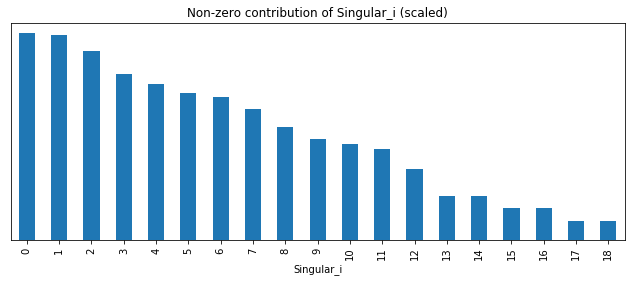

In [48]:
# First enable display of graphs in the notebook
%matplotlib inline 
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 11, 4

ssa.view_s_contributions(adjust_scale=True)

In [50]:
ssa.s_contributions

,Contribution
0,0.8393
1,0.1061
2,0.0134
3,0.0059
4,0.0048
5,0.0041
6,0.0038
7,0.0032
8,0.0026
9,0.0023


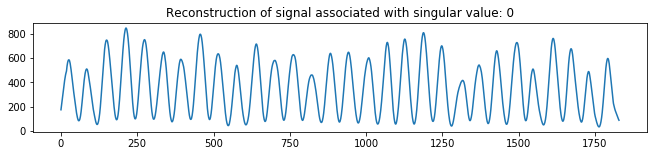

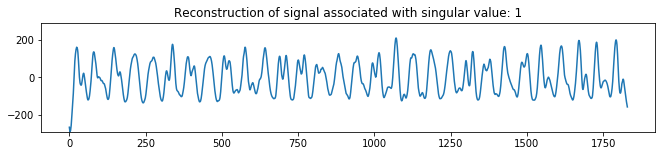

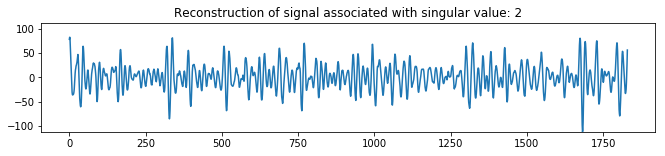

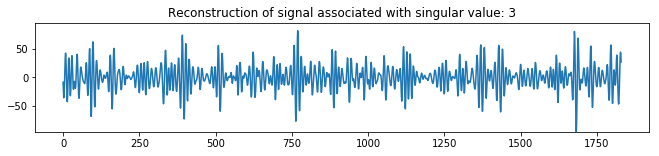

In [51]:
rcParams['figure.figsize'] = 11, 2
for i in range(3):
    ssa.view_reconstruction(ssa.Xs[i], names=i, symmetric_plots=i!=0)
rcParams['figure.figsize'] = 11, 4

In [56]:
[i for i in range(2)]

[0, 1]

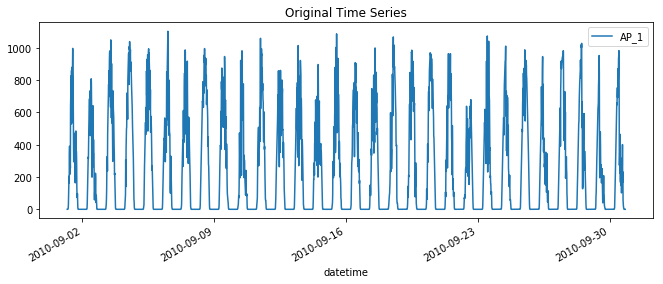

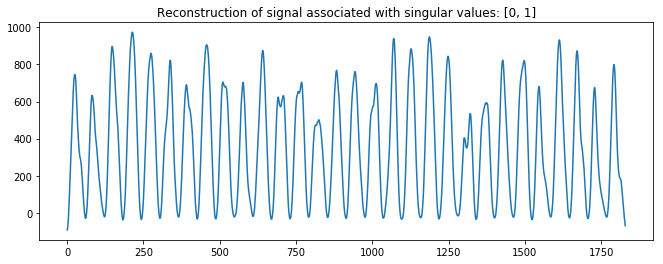

In [53]:
ssa.ts.plot(title='Original Time Series'); # This is the original series for comparison
streams5 = [i for i in range(2)]
reconstructed5 = ssa.view_reconstruction(*[ssa.Xs[i] for i in streams5], names=streams5, plot=False, return_df=True)

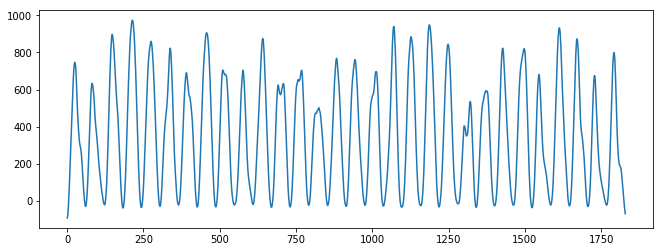

In [57]:
plt.plot(reconstructed5)